In [108]:
# Jameson Scheme for 1D linear wave equation
import numpy as np
import matplotlib.pyplot as plt

A = 1 
x_min, x_max = -0.5, 0.5 
L = x_max - x_min
Mx = 100 
dx = L / Mx
CFL = 0.5 
dt = CFL * dx / A
T = 0.1
Mt = int(T / dt)
mu = 0.01

x = np.linspace(x_min, x_max, Mx, endpoint=False)

U = np.zeros(x.shape)

def Initial_Condition(x):
    if -0.5 <= x and x < -0.25:
        return 0
    elif x >= -0.25 and x <= 0.25:
        return 1
    elif x > 0.25 and x <= 0.5:
        return 0
    else:
        print(x)
        raise ValueError("The spatial coordinate is out of the computatioanl domain.")
        
def P_delta(U,c=CFL,mu=mu,dx=dx, Mx=Mx, dt=dt):
    sigma = c / dt
    out = U.copy()
    for j in range(Mx):
        
        out[j] = 0.5 * sigma * (U[(j+1)%Mx]-U[(j-1)%Mx]) + np.abs(sigma) * mu * (U[(j+2)%Mx]-4*U[(j+1)%Mx]+6*U[(j)]-4*U[(j-1)%Mx]+U[(j-2)%Mx])
    return out

def Jameson(U,T,mu=mu,CFL=CFL):
    Um = U.copy()
    for j in range(Mx):
        U[j] = Initial_Condition(x_min + j * dx)
    for n in range(int(T/dt)):
        Um = U.copy()
        
        U1 = Um - dt * P_delta(Um,c=CFL,mu=mu) / 4
        U2 = Um - dt * P_delta(U1,c=CFL,mu=mu) / 3
        U3 = Um - dt * P_delta(U2,c=CFL,mu=mu) / 2
        U = Um - dt * P_delta(U3,c=CFL,mu=mu)
    return U 
    


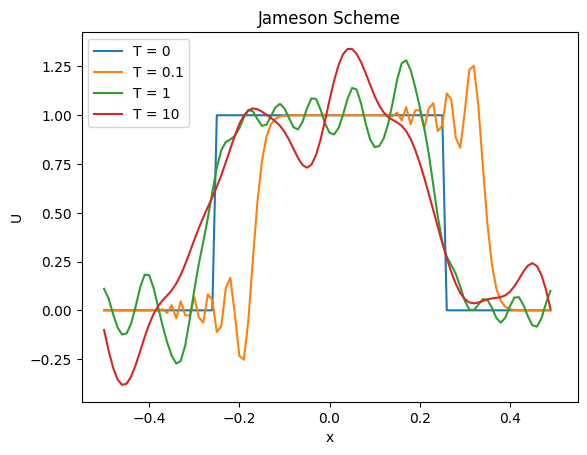

In [93]:
fig, ax = plt.subplots() 

ax.plot(x, U0, label='T = 0')
U1 = Jameson(U, 0.1)
ax.plot(x, U1, label='T = 0.1')
U2 = Jameson(U, 1.0)
ax.plot(x, U2, label='T = 1') 
U3 = Jameson(U, 10)
ax.plot(x, U3, label='T = 10') 
ax.set_xlabel('x') 
ax.set_xlim(-0.55,0.55)
# ax.set_ylim(0,1.25)
ax.set_ylabel('U') 
ax.set_title('Jameson Scheme') 
ax.legend() 

plt.show() 

In [106]:
def Test(mu,CFL=CFL):
    fig, ax = plt.subplots() 

    ax.plot(x, U0, label='T = 0')
    U1 = Jameson(U, 0.1,mu=mu,CFL=CFL)
    ax.plot(x, U1, label='T = 0.1')
    U2 = Jameson(U, 1.0,mu=mu,CFL=CFL)
    ax.plot(x, U2, label='T = 1') 
    U3 = Jameson(U, 10,mu=mu,CFL=CFL)
    ax.plot(x, U3, label='T = 10') 
    ax.set_xlabel('x') 
    ax.set_xlim(-0.55,0.55)
    # ax.set_ylim(0,1.25)
    ax.set_ylabel('U') 
    ax.set_title(f'Jameson Scheme, mu = {mu}, CFL = {CFL}') 
    ax.legend() 

    plt.show() 
    
def Test_save(mu,CFL=CFL):
    fig, ax = plt.subplots() 

    ax.plot(x, U0, label='T = 0')
    U1 = Jameson(U, 0.1,mu=mu,CFL=CFL)
    ax.plot(x, U1, label='T = 0.1')
    U2 = Jameson(U, 1.0,mu=mu,CFL=CFL)
    ax.plot(x, U2, label='T = 1') 
    U3 = Jameson(U, 10,mu=mu,CFL=CFL)
    ax.plot(x, U3, label='T = 10') 
    ax.set_xlabel('x') 
    ax.set_xlim(-0.55,0.55)
    # ax.set_ylim(0,1.25)
    ax.set_ylabel('U') 
    ax.set_title(f'Jameson Scheme, mu = {mu}, CFL = {CFL}') 
    ax.legend() 

    plt.savefig(f"Jameson_mu{mu}.jpg",dpi=600,bbox_inches='tight') 
    

C:\Users\lky60\AppData\Local\Temp\ipykernel_29820\2527839457.py:36: RuntimeWarning: overflow encountered in scalar multiply
  out[j] = 0.5 * sigma * (U[(j+1)%Mx]-U[(j-1)%Mx]) + np.abs(sigma) * mu * (U[(j+2)%Mx]-4*U[(j+1)%Mx]+6*U[(j)]-4*U[(j-1)%Mx]+U[(j-2)%Mx])
C:\Users\lky60\AppData\Local\Temp\ipykernel_29820\2527839457.py:36: RuntimeWarning: invalid value encountered in scalar subtract
  out[j] = 0.5 * sigma * (U[(j+1)%Mx]-U[(j-1)%Mx]) + np.abs(sigma) * mu * (U[(j+2)%Mx]-4*U[(j+1)%Mx]+6*U[(j)]-4*U[(j-1)%Mx]+U[(j-2)%Mx])


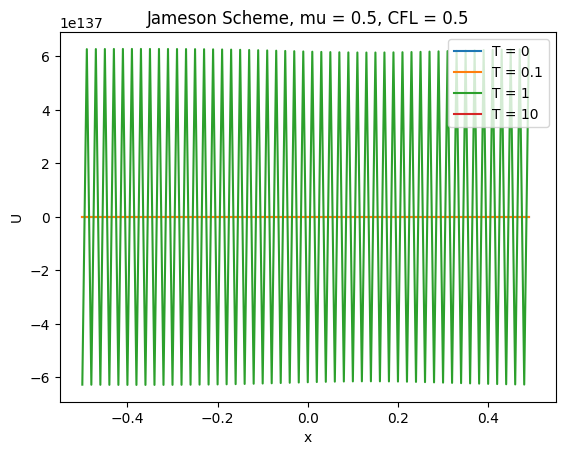

In [117]:
Test_save(0.5,CFL=0.5)

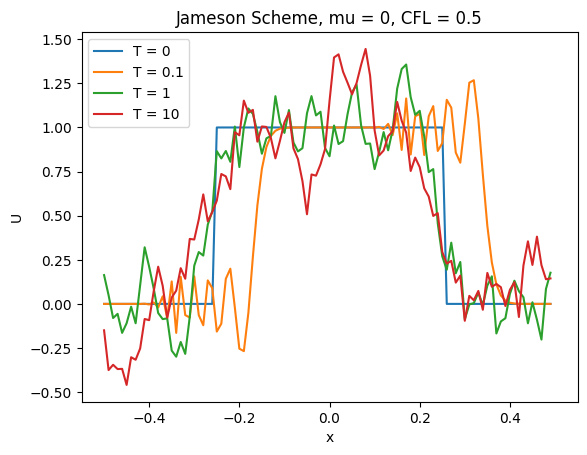

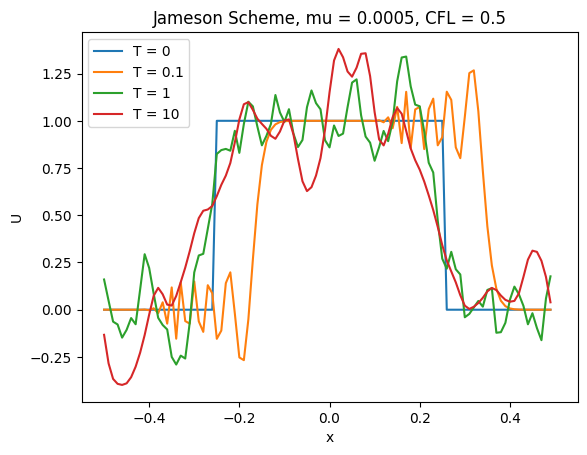

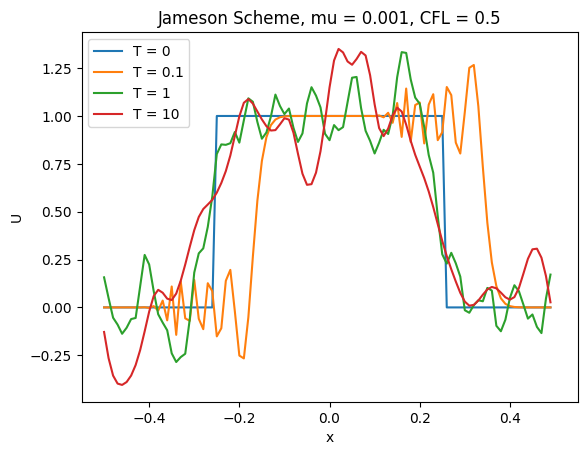

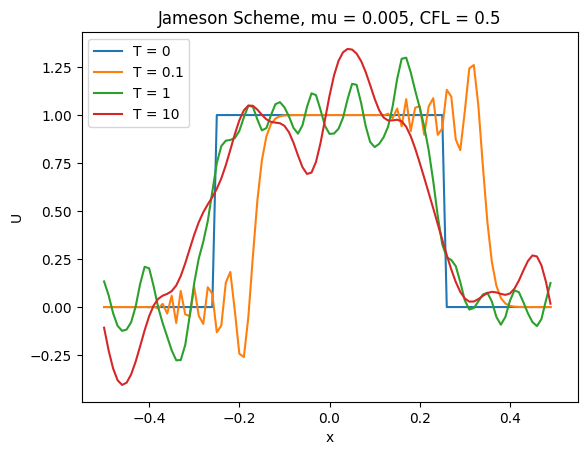

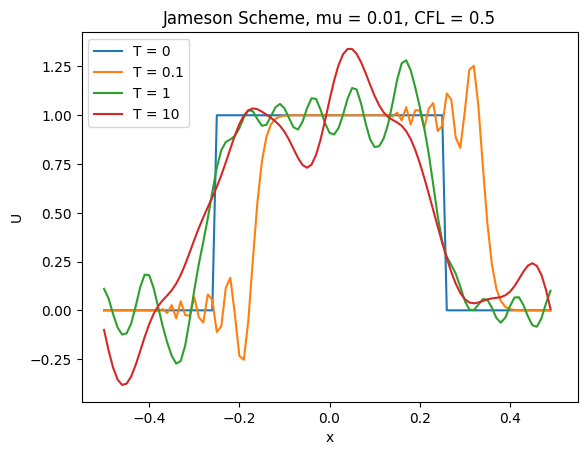

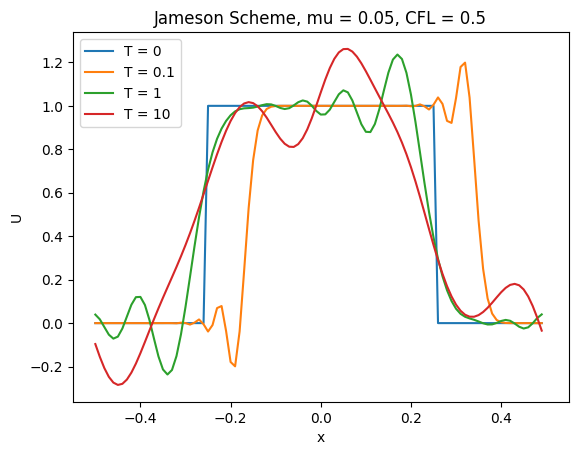

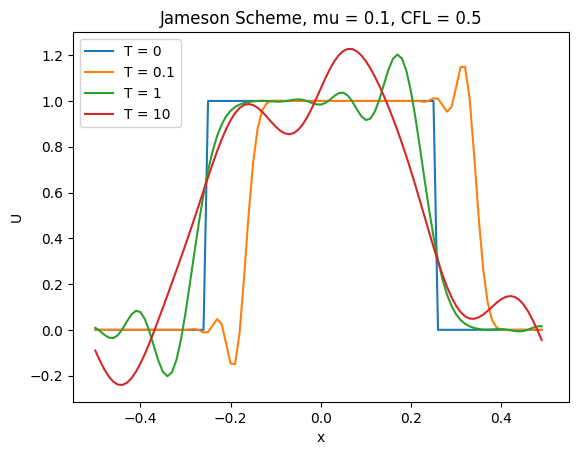

C:\Users\lky60\AppData\Local\Temp\ipykernel_29820\2527839457.py:36: RuntimeWarning: overflow encountered in scalar multiply
  out[j] = 0.5 * sigma * (U[(j+1)%Mx]-U[(j-1)%Mx]) + np.abs(sigma) * mu * (U[(j+2)%Mx]-4*U[(j+1)%Mx]+6*U[(j)]-4*U[(j-1)%Mx]+U[(j-2)%Mx])
C:\Users\lky60\AppData\Local\Temp\ipykernel_29820\2527839457.py:36: RuntimeWarning: invalid value encountered in scalar subtract
  out[j] = 0.5 * sigma * (U[(j+1)%Mx]-U[(j-1)%Mx]) + np.abs(sigma) * mu * (U[(j+2)%Mx]-4*U[(j+1)%Mx]+6*U[(j)]-4*U[(j-1)%Mx]+U[(j-2)%Mx])


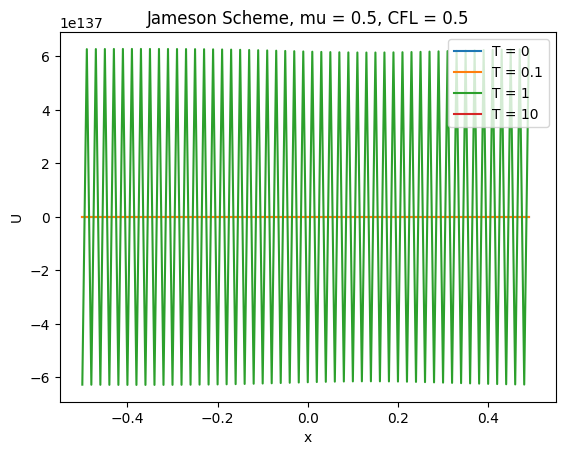

In [96]:
# CFL = 0.5
mu_list = [0,0.0005,0.001,0.005,0.01,0.05,0.1,0.5]

for item in mu_list:
    Test(item)

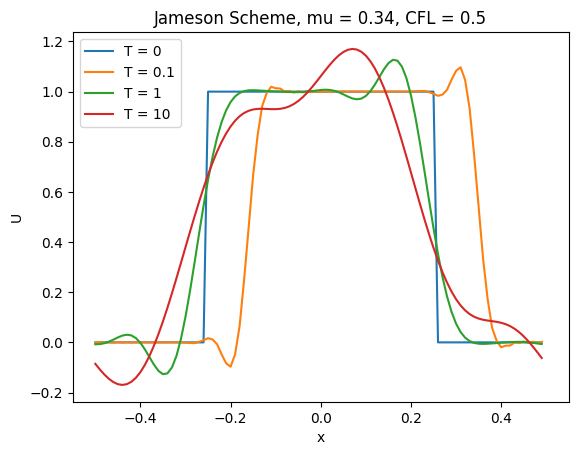

In [127]:
Test_save(0.34,0.5)

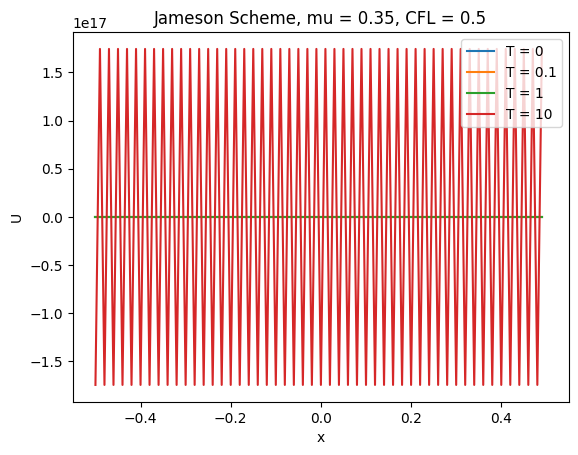

In [128]:
Test_save(0.35,0.5)

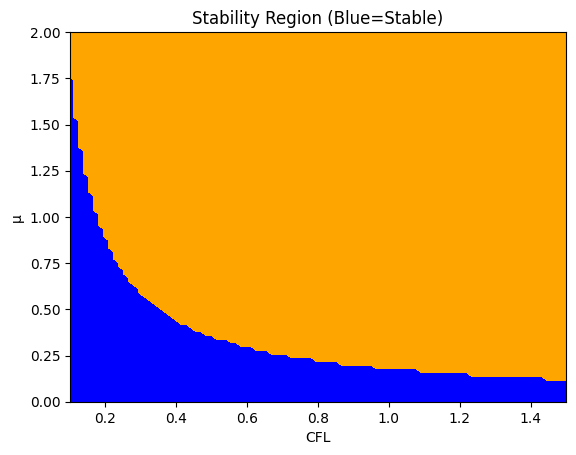

In [118]:
def compute_G(CFL, mu, theta):
    Z = -CFL * (4 * mu * (1 - np.cos(theta))**2 + 1j * np.sin(theta))
    G = 1 + Z + 0.5*Z**2 + Z**3/6 + Z**4/24
    return np.abs(G)

def is_stable(CFL, mu, tol=1e-6):
    theta = np.linspace(0, 2*np.pi, 1000)  
    G_abs = compute_G(CFL, mu, theta)
    return np.all(G_abs <= 1 + tol)

CFL_list = np.linspace(0.1, 1.5, 100)
mu_list = np.linspace(0.0, 2.0, 100)
stability_grid = np.zeros((len(CFL_list), len(mu_list)))

for i, CFL in enumerate(CFL_list):
    for j, mu in enumerate(mu_list):
        stability_grid[i, j] = is_stable(CFL, mu)

plt.contourf(CFL_list, mu_list, stability_grid.T, levels=[-0.5, 0.5, 1.5], colors=['orange', 'blue'])
plt.xlabel('CFL')
plt.ylabel('μ')
plt.title('Stability Region (Blue=Stable)')
# plt.colorbar()
# plt.show()
plt.savefig(f"Stability.jpg",dpi=600,bbox_inches='tight') 

In [2]:
def Stability(CFL,mu):
    Angle_list = np.linspace(0, 2*np.pi,1000)
    Z = - CFL * (4 * mu * (1 - np.cos(Angle_list)) ** 2 + 1j * np.sin(Angle_list))
    G = 1 + Z + 0.5 * Z ** 2 + 1/6 * Z ** 3 + 1/24 * Z ** 4
    arr = np.abs(G)
    result = np.all(arr <= 1)
#     print(result)
    return result

CFL_list = np.linspace(0, 2 * np.sqrt(2),100)
mu_list = np.linspace(0, 2, 100)

def find_max_mu_for_each_CFL(CFL_list, mu_list):
    max_mu_values = np.zeros_like(CFL_list)
    
    for i, CFL in enumerate(CFL_list):
        left, right = 0, len(mu_list) - 1
        best_mu = 0  
        
        while left <= right:
            mid = (left + right) // 2
            mu = mu_list[mid]
            if Stability(CFL, mu):
                best_mu = mu
                left = mid + 1  
            else:
                right = mid - 1  
        
        max_mu_values[i] = best_mu
    
    return max_mu_values

CFL_list = np.linspace(0.1, 2 * np.sqrt(2), 1000)
mu_list = np.linspace(0, 2, 20000)

max_mu_results = find_max_mu_for_each_CFL(CFL_list, mu_list)

for CFL, max_mu in zip(CFL_list, max_mu_results):
    print(f"CFL = {CFL:.4f}: Max mu for stability = {max_mu:.4f}")

CFL = 0.1000: Max mu for stability = 1.7408
CFL = 0.1027: Max mu for stability = 1.6945
CFL = 0.1055: Max mu for stability = 1.6506
CFL = 0.1082: Max mu for stability = 1.6090
CFL = 0.1109: Max mu for stability = 1.5693
CFL = 0.1137: Max mu for stability = 1.5316
CFL = 0.1164: Max mu for stability = 1.4957
CFL = 0.1191: Max mu for stability = 1.4614
CFL = 0.1218: Max mu for stability = 1.4286
CFL = 0.1246: Max mu for stability = 1.3973
CFL = 0.1273: Max mu for stability = 1.3673
CFL = 0.1300: Max mu for stability = 1.3386
CFL = 0.1328: Max mu for stability = 1.3111
CFL = 0.1355: Max mu for stability = 1.2847
CFL = 0.1382: Max mu for stability = 1.2593
CFL = 0.1410: Max mu for stability = 1.2349
CFL = 0.1437: Max mu for stability = 1.2114
CFL = 0.1464: Max mu for stability = 1.1888
CFL = 0.1492: Max mu for stability = 1.1671
CFL = 0.1519: Max mu for stability = 1.1461
CFL = 0.1546: Max mu for stability = 1.1258
CFL = 0.1574: Max mu for stability = 1.1063
CFL = 0.1601: Max mu for stabili

In [131]:
max = find_max_mu_for_each_CFL([0.5], mu_list)
print(max)

[0.34811741]


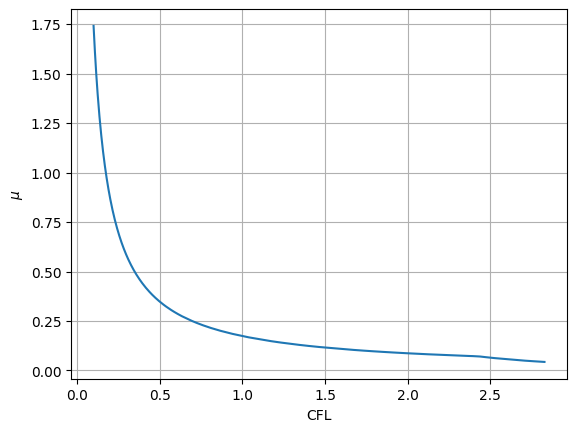

In [134]:
plt.plot(CFL_list, max_mu_results)
plt.xlabel("CFL")
plt.ylabel(r"$\mu$")
plt.grid()
plt.savefig("NumCurve.jpg",dpi=600,bbox_inches='tight')

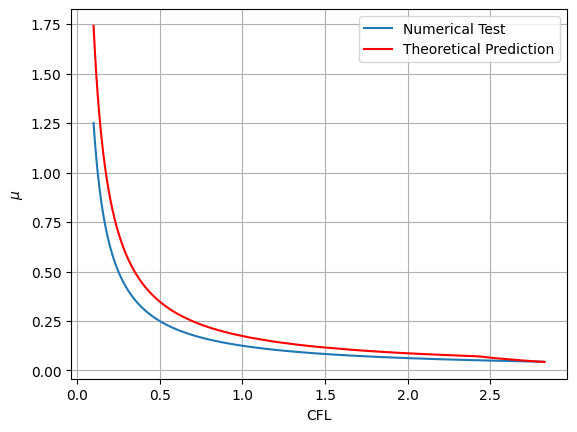

In [4]:
Y_list =  1 / (8 * CFL_list)
plt.plot(CFL_list, Y_list, label='Numerical Test')
plt.plot(CFL_list, max_mu_results, color = 'r',label='Theoretical Prediction')
plt.xlabel("CFL")
plt.ylabel(r"$\mu$")
plt.legend()
plt.grid()
plt.savefig("NumVsThe.jpg",dpi=600,bbox_inches='tight')

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1306.43it/s]


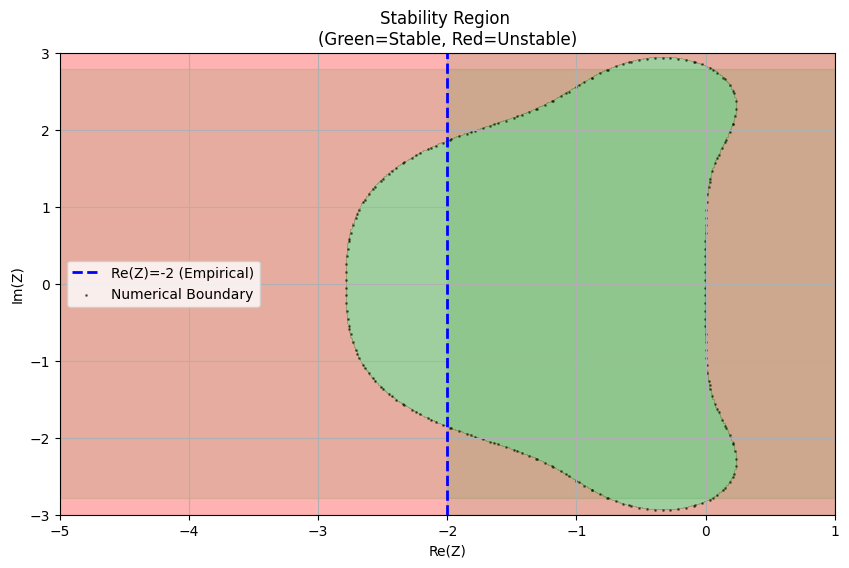

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def compute_G(Z):
    return np.abs(1 + Z + 0.5*Z**2 + (Z**3)/6 + (Z**4)/24)

re_Z = np.linspace(-5, 1, 500)  
im_Z = np.linspace(-3, 3, 500)  
RE, IM = np.meshgrid(re_Z, im_Z)
Z = RE + 1j*IM

G_abs = compute_G(Z)

plt.figure(figsize=(10,6))
plt.contourf(RE, IM, (G_abs <= 1.0 + 1e-3), levels=[0,0.5,1], colors=('red','green'), alpha=0.3)
plt.axvline(-2, color='blue', linestyle='--', linewidth=2, label='Re(Z)=-2 (Empirical)')
# plt.axhline(2.785, color='purple', linestyle=':', linewidth=2, label='Im(Z)=2.785 (Empirical)')
# plt.axhline(-2.785, color='purple', linestyle=':', linewidth=2)


def find_boundary_points():
    boundary_points = []
    for re in tqdm(np.linspace(-5, 1, 100)):
        im_range = np.linspace(-5, 5, 5000)
        Z_line = re + 1j*im_range
        G_line = compute_G(Z_line)
        crossings = np.where(np.diff(G_line <= 1))[0]
        for idx in crossings:
            boundary_points.append( (re, im_range[idx]) )
    
    for im in tqdm(np.linspace(-5, 5, 100)):
        re_range = np.linspace(-5, 1, 5000)
        Z_line = re_range + 1j*im
        G_line = compute_G(Z_line)
        crossings = np.where(np.diff(G_line <= 1))[0]
        for idx in crossings:
            boundary_points.append( (re_range[idx], im) )
    
    return np.array(boundary_points)

boundary = find_boundary_points()
plt.scatter(boundary[:,0], boundary[:,1], s=1, c='black', alpha=0.5, label='Numerical Boundary')

plt.title('Stability Region \n(Green=Stable, Red=Unstable)')
plt.xlabel('Re(Z)')
plt.ylabel('Im(Z)')
plt.grid(True)
plt.axis([-5, 1, -3, 3])
plt.legend()
# plt.colorbar(plt.cm.ScalarMappable(cmap='RdYlGn'), alpha=0.3).set_label('Stability')

# 高亮关键区域
plt.fill_betweenx([-3,3], -2, 1, color='green', alpha=0.1)
plt.fill_betweenx([-2.785,2.785], -5, 1, color='green', alpha=0.1)

plt.savefig("STRegion.jpg",dpi=600, bbox_inches = 'tight')